In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import zipfile
import os
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Dense, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model, Sequential
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
from warnings import filterwarnings
import os

In [4]:
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set parameters
image_size = (150, 150)
batch_size = 32

# Define the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)  # Rescale images

# Load images from directory
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning/Training',  # path to training dataset
    target_size=image_size,        # resize images
    batch_size=batch_size,
    class_mode='categorical'            # use 'categorical' for multi-class classification
)

# Similarly for testing or validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning/Testing',    # path to testing/validation dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [6]:
# Define the ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and augment images from directory
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning/Training',  # path to training dataset
    target_size=image_size,        # resize images
    batch_size=batch_size,
    class_mode='categorical'            # use 'categorical' for multi-class classification
)

# For the validation/testing data, usually, no augmentation is done
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning/Testing',    # path to testing/validation dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


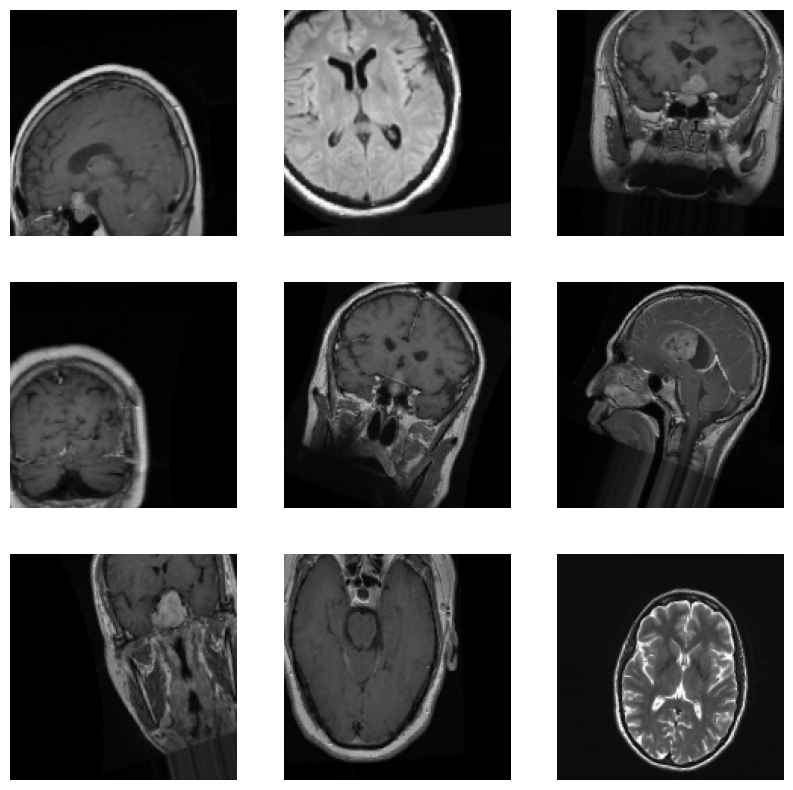

In [7]:
import matplotlib.pyplot as plt

# Get a batch of images and labels
x_batch, y_batch = next(train_generator)

# Plot the first 9 images in the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()

In [9]:
X_train =[]
y_train =[]
image_size =150
for i in labels :
    folderPath = os.path.join('/content/drive/MyDrive/deep_learning/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels :
    folderPath = os.path.join('/content/drive/MyDrive/deep_learning/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 128.66it/s]


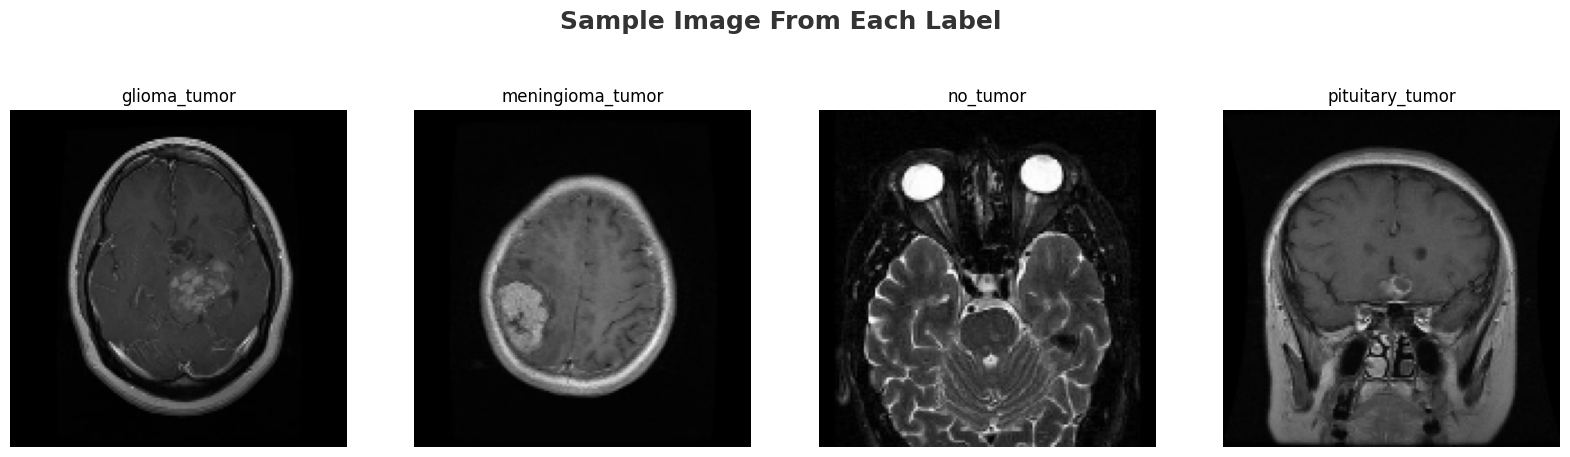

In [12]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Create an instance of ImageDataGenerator
# train_datagen = ImageDataGenerator(
#     rescale=1./255,               # Rescale pixel values to the range [0, 1]
#     rotation_range=20,            # Randomly rotate images in the range of 20 degrees
#     width_shift_range=0.2,        # Randomly translate images horizontally by 20% of the width
#     height_shift_range=0.2,       # Randomly translate images vertically by 20% of the height
#     shear_range=0.2,              # Randomly apply shearing transformations
#     zoom_range=0.2,               # Randomly zoom in on images
#     horizontal_flip=True,         # Randomly flip images horizontally
#     fill_mode='nearest'           # Fill in newly created pixels after a transformation
# )


In [ ]:
# train_generator = train_datagen.flow_from_directory(
#     '/content/drive/MyDrive/deep_learning/Training',  # Path to training dataset
#     target_size=image_size,        # Resize images to the specified size (e.g., (150, 150))
#     batch_size=batch_size,         # Number of images to be yielded from the generator per batch
#     class_mode='binary'            # Use 'binary' for binary classification; use 'categorical' for multi-class classification
# )


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [14]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [15]:
X_train.shape


(3264, 150, 150, 3)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [17]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from tensorflow.keras.applications import EfficientNetB0

In [22]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [23]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [24]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 150, 150, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 150, 150, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 150, 150, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 151, 151, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 75, 75, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 75, 75, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 75, 75, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 75, 75, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 75, 75, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 75, 75, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [25]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [27]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [28]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.7401 - loss: 0.6566
Epoch 1: val_accuracy improved from -inf to 0.83673, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 142s 766ms/step - accuracy: 0.7412 - loss: 0.6543 - val_accuracy: 0.8367 - val_loss: 0.4131 - learning_rate: 0.0010
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9205 - loss: 0.2135
Epoch 2: val_accuracy improved from 0.83673 to 0.86395, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 45s 89ms/step - accuracy: 0.9205 - loss: 0.2135 - val_accuracy: 0.8639 - val_loss: 0.4115 - learning_rate: 0.0010
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9678 - loss: 0.0964
Epoch 3: val_accuracy improved from 0.86395 to 0.91497, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9678 - loss: 0.0965 - val_accuracy: 0.9150 - val_loss: 0.3804 - learning_rate: 0.0010
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.97

In [29]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 833ms/step


In [30]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        93
           1       0.99      0.98      0.98        95
           2       0.98      1.00      0.99        52
           3       1.00      1.00      1.00        87

    accuracy                           0.99       327
   macro avg       0.99      0.99      0.99       327
weighted avg       0.99      0.99      0.99       327

